In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors

import numpy as np
import pandas as pd
import os,glob
import logging
from helper import getModelDict


c_light = 3e8

FORMAT = '%(levelname)s: %(message)s at %(asctime)s'
logging.basicConfig(format=FORMAT,datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger()

In [2]:
defaultPars = {'figure.figsize': (5, 4),
               'lines.markersize' : 4,
               'axes.titlesize' : 13,
               'font.size' : 13,
               'axes.labelsize' : 16,
               'xtick.labelsize' : 13,
               'ytick.labelsize' : 13,
               'legend.fontsize' : 10,
               "text.usetex": True,
               "font.family": "sans-serif",
               "font.sans-serif": ["Helvetica"],
               'font.family':'Times New Roman', 
               'font.serif':'Times New Roman',
               "savefig.dpi" : 300,
               'contour.linewidth' : 2.0,
               'lines.linewidth' : 2.0,
               'axes.grid' : True,
               'grid.linewidth' : 0.5,
               'grid.color' : 'lightgray',
               'axes.axisbelow' : True
               }
plt.rcParams.update(defaultPars)

### Banner files to be read

In [3]:
files = list(glob.glob('./lifetime_scan/Events/run_*/*banner.txt'))

modelDict = {}
for f in files:
    if not os.path.isfile(f):
        print(f'File {f} not found. Skipping.')
    else:
        modelDict[f] = getModelDict(f,verbose=False)


In [4]:
df = pd.DataFrame.from_dict(modelDict.values()).round({'m0' : 1, 'm1'  : 1})

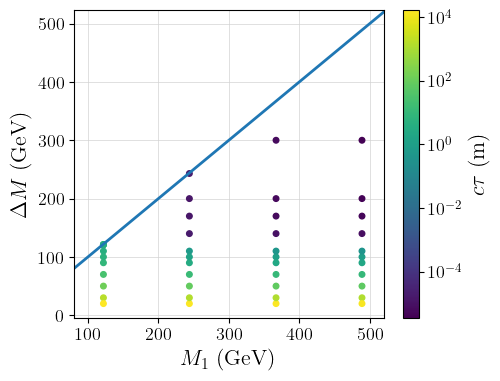

In [5]:
plt.scatter(df['m1'],df['m1']-df['m0'],c=df['tau']*c_light,norm=colors.LogNorm())
plt.colorbar(label=r'$c \tau$ (m)')
plt.xlabel(r'$M_1$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.axline((100.,100.),(500.,500.))
plt.show()

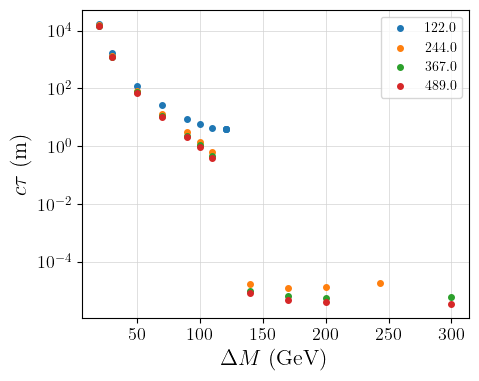

In [23]:
for m1,m1_index in df.groupby('m1').groups.items():
    dfFilter = df.iloc[m1_index]
    plt.scatter(dfFilter['m1']-dfFilter['m0'],dfFilter['tau']*c_light,label=f'{m1:1.1f}')

plt.ylabel(r'$c \tau$ (m)')
plt.xlabel(r'$\Delta M$ (GeV)')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
def getLambdaFor(df,m1,m0,ctau_m):
    filterData = df[(df['m1'] == np.round(m1,1)) & (df['m0'] == np.round(m0,1))]
    if len(filterData) == 0:
        print(f'Point m1 = {m1} and m0 = {m0} not in data')
        return None
    ctau0 = filterData['tau'].iloc[0]*c_light
    lamb = filterData['lambdauv'].iloc[0]
    newlamb = np.sqrt(ctau_m/ctau0)*lamb

    return newlamb




In [ ]:
print(getLambdaFor(df=df,m1=489.0,m0=189.0,ctau_m=3.0))

In [ ]:
import itertools

m1List = np.arange(100.,1000.,10.)
dmList = np.arange(1.,500.,5.)
m1_dm = np.array([(m1,dm) for m1,dm in itertools.product(m1List,dmList) if dm < m1],
                 dtype=np.dtype([('m1', np.float64),('dm', np.float64)])
                )
print(len(m1_dm))
for block in np.split(m1_dm[['m1','dm']],10):
    print(block.tolist(),'\n')

7360
[(100.0, 1.0), (100.0, 6.0), (100.0, 11.0), (100.0, 16.0), (100.0, 21.0), (100.0, 26.0), (100.0, 31.0), (100.0, 36.0), (100.0, 41.0), (100.0, 46.0), (100.0, 51.0), (100.0, 56.0), (100.0, 61.0), (100.0, 66.0), (100.0, 71.0), (100.0, 76.0), (100.0, 81.0), (100.0, 86.0), (100.0, 91.0), (100.0, 96.0), (110.0, 1.0), (110.0, 6.0), (110.0, 11.0), (110.0, 16.0), (110.0, 21.0), (110.0, 26.0), (110.0, 31.0), (110.0, 36.0), (110.0, 41.0), (110.0, 46.0), (110.0, 51.0), (110.0, 56.0), (110.0, 61.0), (110.0, 66.0), (110.0, 71.0), (110.0, 76.0), (110.0, 81.0), (110.0, 86.0), (110.0, 91.0), (110.0, 96.0), (110.0, 101.0), (110.0, 106.0), (120.0, 1.0), (120.0, 6.0), (120.0, 11.0), (120.0, 16.0), (120.0, 21.0), (120.0, 26.0), (120.0, 31.0), (120.0, 36.0), (120.0, 41.0), (120.0, 46.0), (120.0, 51.0), (120.0, 56.0), (120.0, 61.0), (120.0, 66.0), (120.0, 71.0), (120.0, 76.0), (120.0, 81.0), (120.0, 86.0), (120.0, 91.0), (120.0, 96.0), (120.0, 101.0), (120.0, 106.0), (120.0, 111.0), (120.0, 116.0), (130

In [18]:
np.savetxt('lifetime_scan_pars.csv',m1_dm,delimiter=',',header='m1,dm')

In [21]:
r = np.genfromtxt('lifetime_scan_pars.csv',delimiter=',',names=True)
r[['m1','dm']].tolist()

[(100.0, 1.0),
 (100.0, 6.0),
 (100.0, 11.0),
 (100.0, 16.0),
 (100.0, 21.0),
 (100.0, 26.0),
 (100.0, 31.0),
 (100.0, 36.0),
 (100.0, 41.0),
 (100.0, 46.0),
 (100.0, 51.0),
 (100.0, 56.0),
 (100.0, 61.0),
 (100.0, 66.0),
 (100.0, 71.0),
 (100.0, 76.0),
 (100.0, 81.0),
 (100.0, 86.0),
 (100.0, 91.0),
 (100.0, 96.0),
 (110.0, 1.0),
 (110.0, 6.0),
 (110.0, 11.0),
 (110.0, 16.0),
 (110.0, 21.0),
 (110.0, 26.0),
 (110.0, 31.0),
 (110.0, 36.0),
 (110.0, 41.0),
 (110.0, 46.0),
 (110.0, 51.0),
 (110.0, 56.0),
 (110.0, 61.0),
 (110.0, 66.0),
 (110.0, 71.0),
 (110.0, 76.0),
 (110.0, 81.0),
 (110.0, 86.0),
 (110.0, 91.0),
 (110.0, 96.0),
 (110.0, 101.0),
 (110.0, 106.0),
 (120.0, 1.0),
 (120.0, 6.0),
 (120.0, 11.0),
 (120.0, 16.0),
 (120.0, 21.0),
 (120.0, 26.0),
 (120.0, 31.0),
 (120.0, 36.0),
 (120.0, 41.0),
 (120.0, 46.0),
 (120.0, 51.0),
 (120.0, 56.0),
 (120.0, 61.0),
 (120.0, 66.0),
 (120.0, 71.0),
 (120.0, 76.0),
 (120.0, 81.0),
 (120.0, 86.0),
 (120.0, 91.0),
 (120.0, 96.0),
 (120.0, 101

In [29]:
df[(df['m1'] == 489.)]

,m1,m0,mS,tau,lambdauv,chxx10,ychi1,ychi10,sina
0,489.0,189.0,1000.0,1.186103e-14,12000000.0,0.1,1.0,1.0,0.2
3,489.0,289.0,1000.0,1.354014e-14,12000000.0,0.1,1.0,1.0,0.2
7,489.0,459.0,1000.0,3.973556e-06,12000000.0,0.1,1.0,1.0,0.2
8,489.0,399.0,1000.0,6.952139e-09,12000000.0,0.1,1.0,1.0,0.2
13,489.0,469.0,1000.0,4.812952e-05,12000000.0,0.1,1.0,1.0,0.2
15,489.0,419.0,1000.0,3.432396e-08,12000000.0,0.1,1.0,1.0,0.2
17,489.0,439.0,1000.0,2.312274e-07,12000000.0,0.1,1.0,1.0,0.2
18,489.0,389.0,1000.0,3.139876e-09,12000000.0,0.1,1.0,1.0,0.2
33,489.0,319.0,1000.0,1.633150e-14,12000000.0,0.1,1.0,1.0,0.2
36,489.0,379.0,1000.0,1.276457e-09,12000000.0,0.1,1.0,1.0,0.2


In [33]:
6.582e-25/1.655281e-19

3.97636413394463e-06